# Гочнчаров Кирилл Александрович
## ИВТ-б-о-19-1
## Лабораторная работа 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sns

## Вспоминаем прошлый семинар

Считаем данные о станциях московского метрополитена в 2014 году:

In [2]:
metro_data = pd.read_csv('metro_2014_pairwise.csv')

Формат такой: две станции записаны в одной строке, если между ними есть перегон.

Загрузим данные в граф из подготовленной таблицы:



In [3]:
metro_graph = nx.from_pandas_edgelist(metro_data, source='Start station', target='End station')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
metro_graph = nx.to_undirected(metro_graph)

print(nx.info(metro_graph))

Name: 
Type: Graph
Number of nodes: 194
Number of edges: 229
Average degree:   2.3608


### Метрики на графе

Вычислим плотность сети:

In [4]:
nx.density(metro_graph)

0.012232252550611613

Вычислим коэффициент кластеризации для графа:

In [5]:
nx.transitivity(metro_graph)

0.064

Вычислим центральности:

In [6]:
degree = nx.degree_centrality(metro_graph)
betweenness = nx.betweenness_centrality(metro_graph)
closeness = nx.closeness_centrality(metro_graph)

In [7]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
}

pd.DataFrame(graph_measures)

,degree,betweenness,closeness
Сокольническая_Черкизовская,0.005181,0.000000,0.080417
Сокольническая_Преображенская_площадь,0.010363,0.010363,0.087409
Сокольническая_Сокольники,0.010363,0.020617,0.095639
Сокольническая_Красносельская,0.010363,0.030764,0.105464
Сокольническая_Комсомольская,0.015544,0.043644,0.117397
...,...,...,...
Арбатско-Покровская_Митино,0.010363,0.010363,0.061485
Арбатско-Покровская_Пятницкое_шоссе,0.005181,0.000000,0.057941
Люблинская_Марьина_Роща,0.005181,0.000000,0.100416
Люблинская_Шипиловская,0.010363,0.010342,0.066369


Посмотрим, какие станции обладают максимальными показателями и проинтерпретируем:

In [8]:
pd.DataFrame(graph_measures).sort_values(by='betweenness', ascending=False)

,degree,betweenness,closeness
Кольцевая_Киевская,0.020725,0.182014,0.133195
Арбатско-Покровская_Киевская,0.020725,0.142770,0.126226
Кольцевая_Парк_культуры,0.015544,0.142050,0.133564
Серпуховско-Тимирязевская_Серпуховская,0.015544,0.136287,0.130142
Кольцевая_Октябрьская,0.015544,0.129519,0.136782
...,...,...,...
Арбатско-Покровская_Щёлковская,0.005181,0.000000,0.070644
Замоскворецкая_Алма-Атинская,0.005181,0.000000,0.067037
Замоскворецкая_Речной_вокзал,0.005181,0.000000,0.071008
Сокольническая_Юго-Западная,0.005181,0.000000,0.071827


## Реальные данные

Подгрузка данных из файла-не таблицы осуществляется достаточно просто, если данные записаны в правильном формате. 

Примеры наиболее популярных форматов для чтения и сохранения графов (больше можно найти в документации NetworkX):
- список смежных вершин (`nx.read_adjlist`, `nx.write_adjlist`, именно так хранятся графы в NetworkX)
- список всех рёбер (`nx.read_edgelist`, `nx.write_edgelist`)

Первые строки нашего файла `facebook_combined.txt` выглядят так:(ничего подобного, какой файл нашли, так и выглядат)
```
214328887 34428380
17116707 28465635
380580781 18996905
221036078 153460275
107830991 17868918
151338729 222261763
```

Каждое число обозначает имя вершины (грубо говоря, id пользователя) в графе. Если в одной строке записана пара чисел, значит, пользователи с соответствующими номерами находятся друг у друга в списке друзей.

In [9]:
facebook_users = nx.read_edgelist("facebook_combined.txt")

Узнайте, сколько граф содержит вершин и связей:

In [10]:
print('Number of nodes:', facebook_users.number_of_nodes())
print('Number of edges:', facebook_users.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


Нарисуйте граф данной сети:

Wall time: 44.4 s


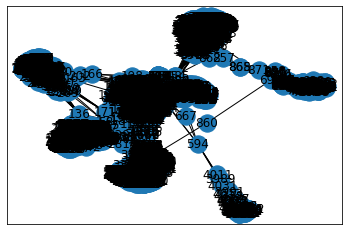

In [11]:
%%time
nx.draw_networkx(facebook_users)

Нарисуем график, отражающий распределение степеней вершины:

Text(0.5, 1.0, 'Facebook users connectivity degrees')

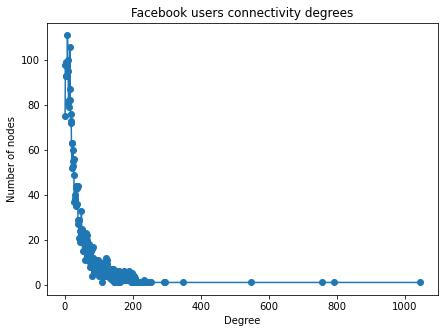

In [12]:
degrees = dict(facebook_users.degree()) # dictionary node:degree
values = sorted(set(degrees.values()))
g_hist = [list(degrees.values()).count(x) for x in values]

plt.figure(figsize=(7, 5))
plt.plot(values, g_hist, 'o-') # degree

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook users connectivity degrees')

Посчитайте изветные вам центральности, найдите время вычисления для каждой из них. Составьте таблицу со значениями центральностей. Отсортируйте ее по одной из центральностей.

In [13]:
%time
degree = nx.degree_centrality(facebook_users)

Wall time: 0 ns


In [14]:
%time
betweenness = nx.betweenness_centrality(facebook_users)

Wall time: 0 ns


In [15]:
%time
closeness = nx.closeness_centrality(facebook_users)

Wall time: 0 ns


In [17]:
graph_measures = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': closeness,
}

pd.DataFrame(graph_measures).sort_values(by='degree', ascending=False)

,degree,betweenness,closeness
107,0.258791,0.480518,0.459699
1684,0.196137,0.337797,0.393606
1912,0.186974,0.229295,0.350947
3437,0.135463,0.236115,0.314413
0,0.085934,0.146306,0.353343
...,...,...,...
602,0.000248,0.000000,0.269848
585,0.000248,0.000000,0.269848
3451,0.000248,0.000000,0.239218
3856,0.000248,0.000000,0.239218
